## Convolution Neural Network for Computer Vision

#### Reference: Deep Learning with Python, 2nd Edition Chapter 8 or Chapter 5 of the 1st Edition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [4]:
# define a small convent
inputs = Input(shape=(28, 28, 1))

x = inputs

# for color images, may need to scale and normalize the inputs
#x = layers.Rescaling(1./255)(inputs)
#x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(10, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
from keras.datasets import mnist

In [25]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(images_set1, labels_set1), (images_set2, labels_set2) = mnist.load_data()

In [26]:
len(images_set1)

60000

In [27]:
len(images_set2)

10000

### Partiion the 60K set1 data into 45K as training, 15K as validation, use the second set as testing dataset

In [28]:
train_images = train_images_orig[:45000].copy()
train_labels = train_labels_orig[:45000].copy()

validation_images = train_images_orig[45000:].copy()
validation_labels = train_labels_orig[45000:].copy()

test_images = images_set2
test_labels = labels_set2

In [29]:
len(train_images)

45000

In [30]:
len(validation_images)

15000

In [31]:
train_images = train_images.reshape((45000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

validation_images = validation_images.reshape((15000, 28, 28, 1))
validation_images = validation_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_images.shape

(45000, 28, 28, 1)

### Build the model

In [32]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
# model.fit(train_images, train_labels, epochs=5, batch_size=64)

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split = 0.3)

Epoch 1/5
493/493 [==============================] - 25s 50ms/step - loss: 0.2390 - accuracy: 0.9255 - val_loss: 0.1426 - val_accuracy: 0.9511
Epoch 2/5
493/493 [==============================] - 26s 52ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0642 - val_accuracy: 0.9811
Epoch 3/5
493/493 [==============================] - 23s 47ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0769 - val_accuracy: 0.9771
Epoch 4/5
493/493 [==============================] - 26s 53ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 5/5
493/493 [==============================] - 25s 51ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0480 - val_accuracy: 0.9873


### Evaluating the model out-of-sample

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 8ms/step - loss: 0.0307 - accuracy: 0.9902
Test accuracy: 0.990


***99% accuracy is wonderful***

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


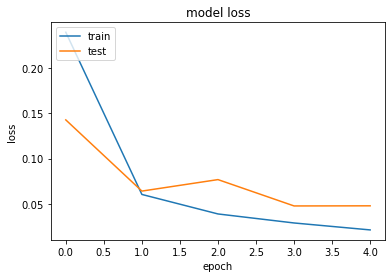

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

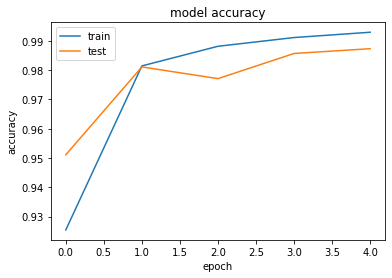

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### You should try different model, especially test what happens if you miss the MaxPooling

In [23]:
# define a small convent
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(10, activation="softmax")(x)
model2 = Model(inputs=inputs, outputs=outputs)
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 61952)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [24]:
# warning: take a lot of time to run
#model2.compile(optimizer="rmsprop",
#    loss="sparse_categorical_crossentropy",
#    metrics=["accuracy"])
#model2.fit(train_images, train_labels, epochs=5, batch_size=64)

In [25]:
#test_loss, test_acc = model.evaluate(test_images, test_labels)
#print(f"Test accuracy: {test_acc:.3f}")